<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/TWITTER_US_AIRLINE_SENTIMENT_PROJECT_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS               # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer # Import count Vectorizer
from sklearn.model_selection import train_test_split    # Import train test split
from sklearn.ensemble import RandomForestClassifier     # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score     # Import cross val score
from sklearn.metrics import confusion_matrix            # Import confusion matrix
from wordcloud import WordCloud                         # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer # Import Tf-Idf vector
import nltk
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Mount Google drive to access the dataset  (Run this code, if you are using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2/22/2015 11:58,"dallas, TX",NaN


In [ ]:
data.duplicated().sum()

36

In [ ]:
data.shape

(14640, 15)

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#exploratory data analysis

#univariate analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

PERCENTAGE OF TWEETS FOR EACH AIRLINE

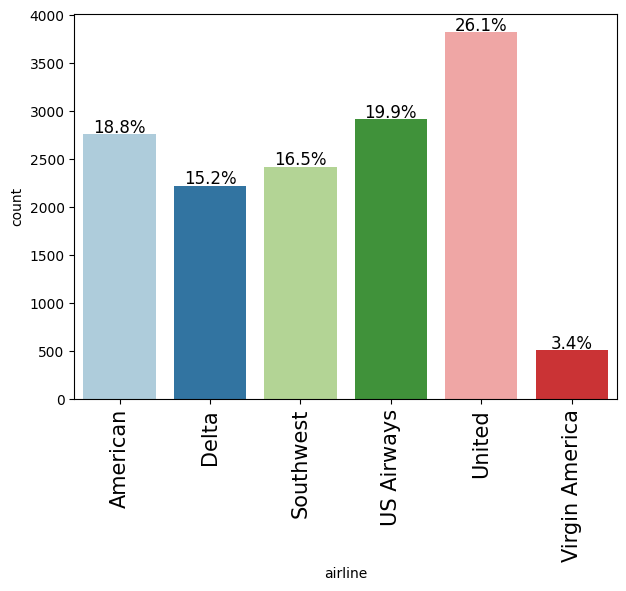

In [ ]:
labeled_barplot(data, "airline", perc=True)         # Complete the code to plot the labeled barplot for airline

DISTRIBTUION OF SENTIMENTS ACROSS ALL TWEETS

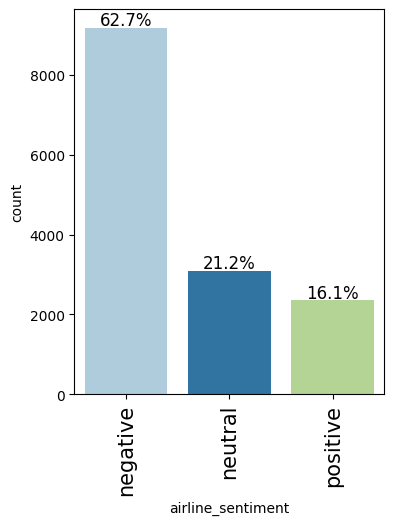

In [ ]:
labeled_barplot(data, "airline_sentiment", perc=True) # Complete the code to plot the labeled barplot for airline_sentiment

PLOT ALL NEGATIVE REASONS

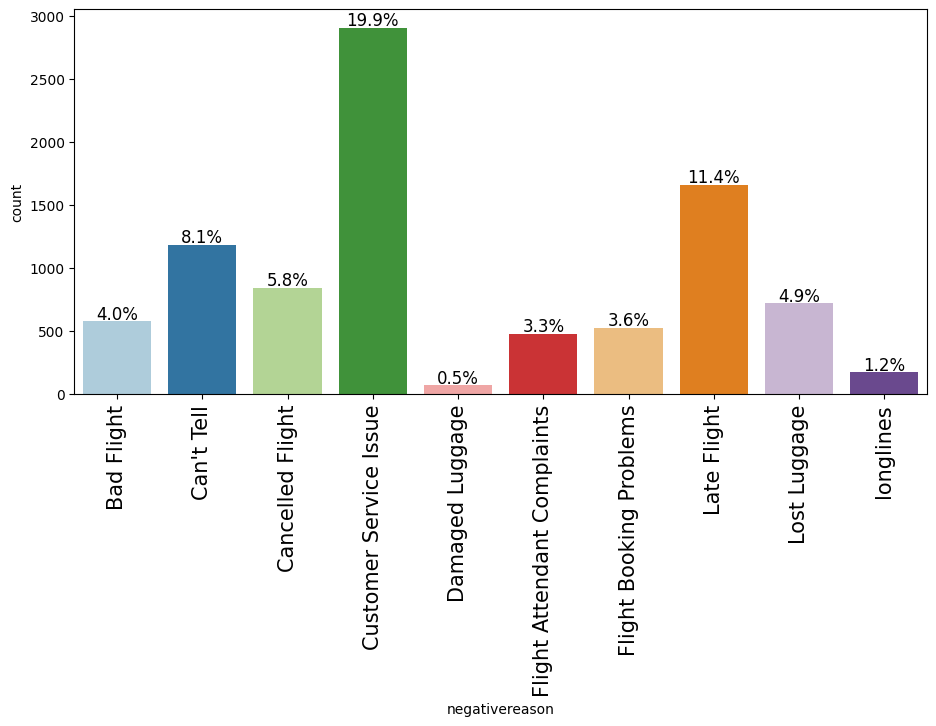

In [ ]:
labeled_barplot(data, "negativereason", perc=True)             # Complete the code to plot the labeled barplot for negative reason

#BIVARIATE ANALYSIS

DISTRIBTUION OF SENTIMENT OF TWEETS FOR EACH AIRLINE

<Axes: xlabel='airline'>

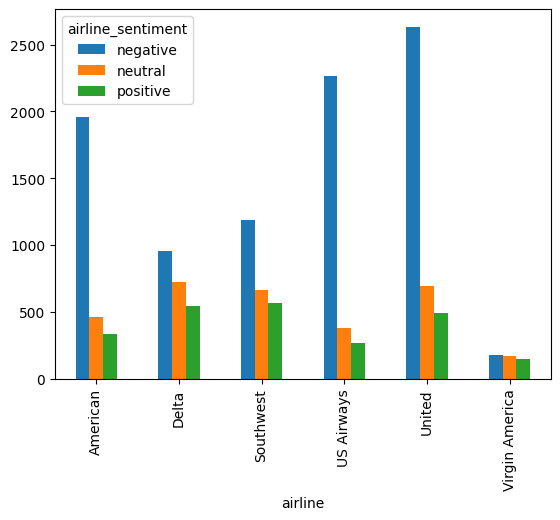

In [ ]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()    # Complete the code to plot the barplot for the distribution of each airline with total sentiments
airline_sentiment.plot(kind='bar')

WORDCLOUD FOR NEGATIVE TWEETS

In [ ]:
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

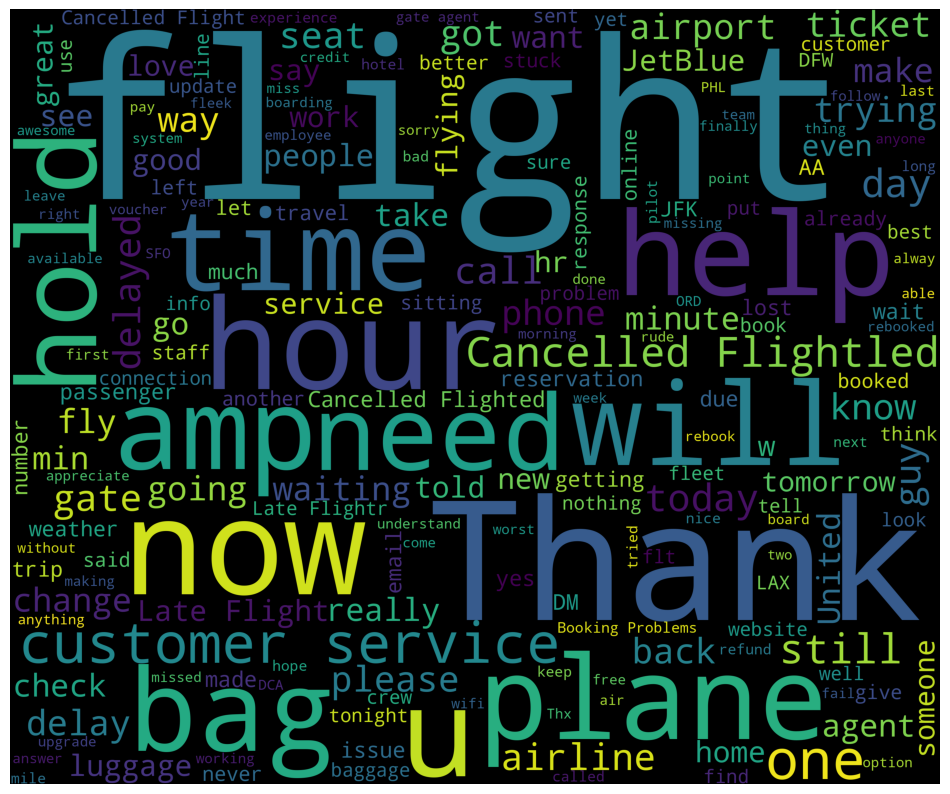

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

WORDCLOUD FOR POSITIVE TWEETS

In [ ]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

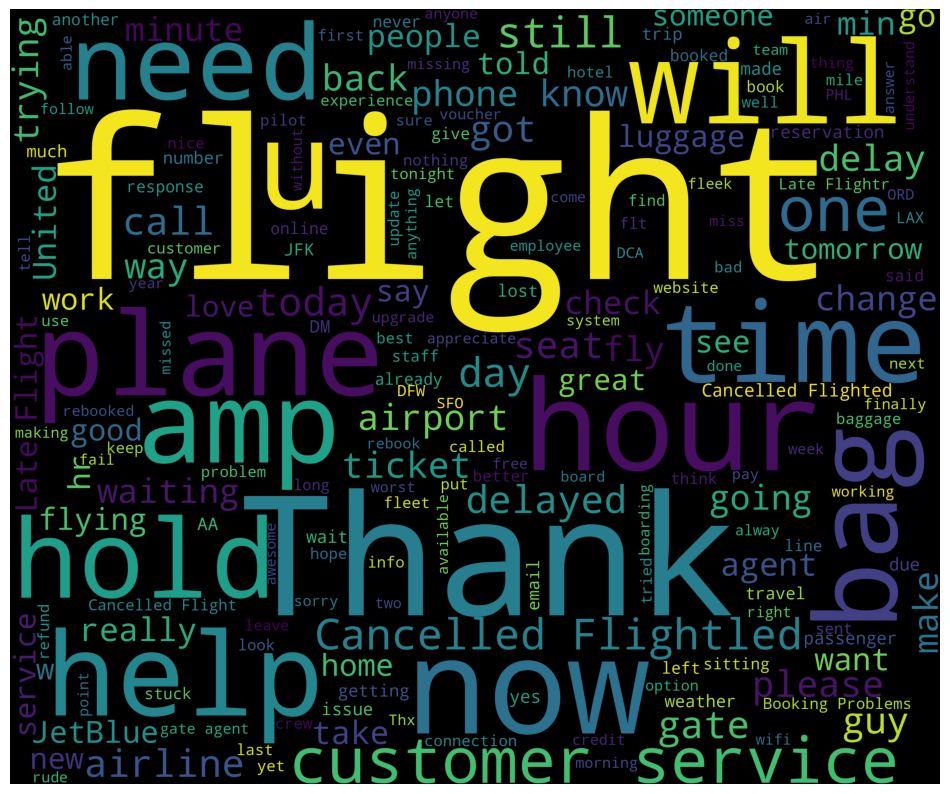

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#DATA PREP FOR MODELING

DROP ALL UNNECESSARY COLUMNS

In [ ]:
# Take text and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]                      # Complete the code to get a subset of data

In [ ]:
data.head(5)                                                            # Complete the code to display the first 5 rows of the dataset

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
data.shape                                                            # Complete the code to get the shape of the data

(14640, 2)

In [ ]:
data['airline_sentiment'].unique()                                         # Complete the code to display the unique values in airline sentiment column

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
data['airline_sentiment'].values.tolist()                                         # Complete the code to display the values in airline sentiment column

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'ne

REMOVE HTML TAGS

In [ ]:
# Code to remove the html tage
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))                        # Complete the code to apply strip html function on text column
data.head()                                                         # Complete the code to display the head of the data

<ipython-input-25-82a76c94111d>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


REPLACE CONTRACTIONS IN STRING

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))                  # Complete the code to apply replace contractions function on text column
data.head()                                                                                # Complete the code to display the head of the data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


REMOVE NUMBERS

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)                                     # Complete the code to
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))                  # Complete the code to apply remove numbers function on text column
data.head()                                                          # Complete the code to display the head of the data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


APPLY TOKENIZATION

In [ ]:
data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Length: 14640, dtype: object

In [ ]:
# Complete the code to apply tokenization on text column
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# Complete the code to display the head of the data
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


APPLY LOWERCASE AND REMOVE STOPWORDS/PUNCTUATION

ADD STOPWORDS

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

ALL PRE-PROCESS STEPS IN ONE FUNCTION

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


#MODEL BUILDING

USING COUNTVECTORIZER

In [ ]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)                # Complete the code to initialize the CountVectorizer function with max_ features = 5000.
data_features = Count_vec.fit_transform(data['text'])                # Complete the code to fit and transrofm the count_vec variable on the text column

data_features = data_features.toarray()                       # Complete the code to convert the datafram into array

In [ ]:
data_features.shape                                     # Complete the code to check the shape of the data features

(14640, 5000)

STORE INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
X = data_features                                            # Complete the code to get the independent variable (data_features) stored as X

y = data.airline_sentiment                                           # Complete the code to get the dependent variable (airline_sentiment) stored as Y

SPLIT DATA INTO TRAIN AND TEST

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=.25, random_state=42)   # Complete the code to split the X and Y into train and test dat

RANDOM FOREST MODEL

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)            # Initialize the Random Forest Classifier

forest = forest.fit(X_train, y_train)                         # Fit the forest variable on X_train and y_train

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))          # Calculate cross validation score

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7165983606557378


OPTIMIZE PARAMETER: NUMBER OF TREES IN RANDOM FOREST MODE(N_ESTIMATORS)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             # Initializing a emptry list to store the score
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)                                                # Complete the code to apply Rondome Forest Classifier
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')          # Complete the code to find the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean())                                                        # Append the scores to cv_scores list

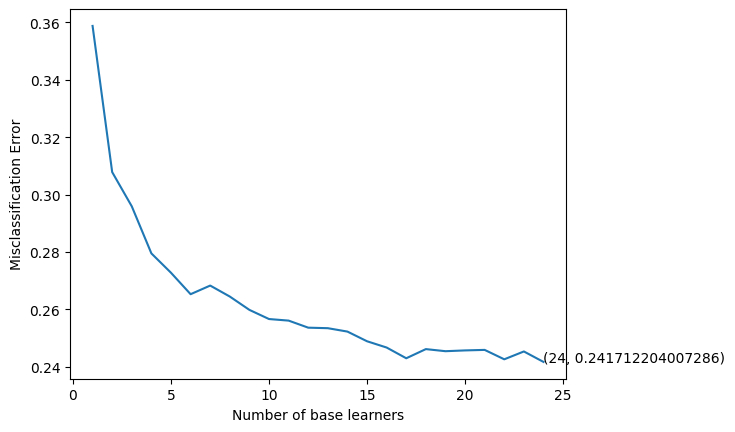

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                     # Initialize the Random Forest classifier with optimal learners
clf.fit(X_train,y_train)                                               # Fit the classifer on X_train and y_train
clf.score(X_test,y_test)                                               # Find the score on X_train and y_train

0.7721311475409836

In [ ]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)                                   # Complete the code to predict the X_test data using the model built above (forest)

In [ ]:
# Print and plot Confusion matirx

conf_mat = confusion_matrix(y_test, result)                       # Complete the code to calculate the confusion matrix between test data and result

print(conf_mat)                                                   # Print confusion matrix

[[2128  163   49]
 [ 318  358   62]
 [ 154   88  340]]


<Axes: >

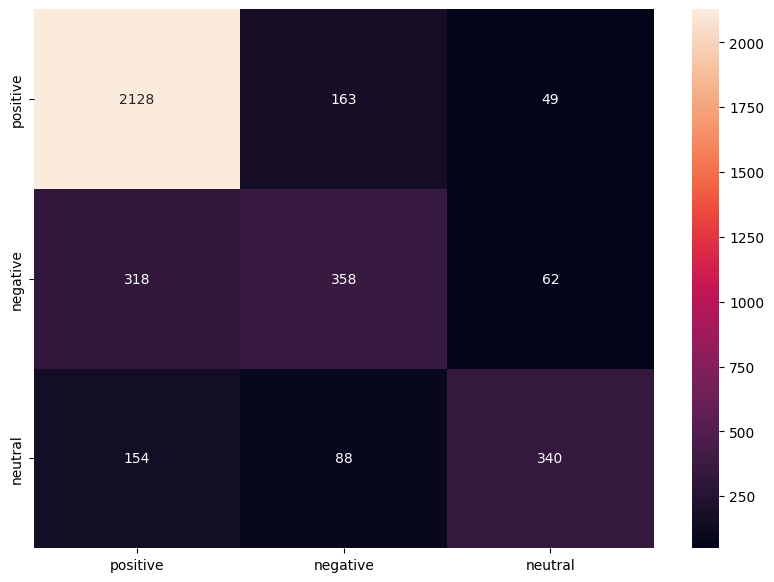

In [ ]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

WORD CLOUD OF TO 40 IMPORTANT FEATURES FROM COUNTVECTORIZER & RANDOM FOREST MODE

In [ ]:
all_features = Count_vec.get_feature_names_out()                     # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank,not,great,jetblue,delay,usairways,flight,http,hours,unite,awesome,southwestair,hold,love,get,virginamerica,cancel,americanair,bag,wait,amaze,hour,call,customer,time,service,dm,still,please,follow,go,help,make,fly,airline,would,good,say,one,best,
 
 


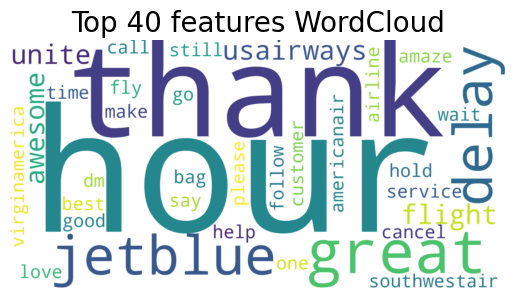

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#TF-IDF(TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY)

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = TfidfVectorizer(max_features=5000)                          # Complete the code to initialize the TF-IDF vector function with max_features = 5000.
data_features = tfidf_vect.fit_transform(data['text'])                   # Fit the tf idf function on the text column

data_features = data_features.toarray()                                  # Complete the code to convert the datafram into array

In [ ]:
data_features.shape                                                # Complete the code to check the shape of the data features

(14640, 5000)

STORE INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
X = data_features                                                       # Complete the code to get the independent variable (data_features) stored as X

y = data.airline_sentiment                                                     # Complete the code to get the dependent variable (airline_sentiment) stored as Y

SPLIT DATA INTO TRAIN AND TEST

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =train_test_split (X,y, test_size=.25, random_state=42)   # Complete the code to split the X and Y into train and test dat

RANDOM FOREST MODEL

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)            # Initialize the Random Forest Classifier

forest = forest.fit(X_train, y_train)                         # Fit the forest variable on X_train and y_train

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))          # Calculate cross validation score

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7114754098360656


OPTIMIZE PARAMETER: NUMBER OF TREES IN RANDOM FOREST MODEL(N_ESTIMATORS)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []                                                                             # Initializing a emptry list to store the score
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)                                                # Complete the code to apply Rondome Forest Classifier
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')          # Complete the code to find the cross-validation score on the classifier (clf) for accuracy
    cv_scores.append(scores.mean())                                                        # Append the scores to cv_scores list

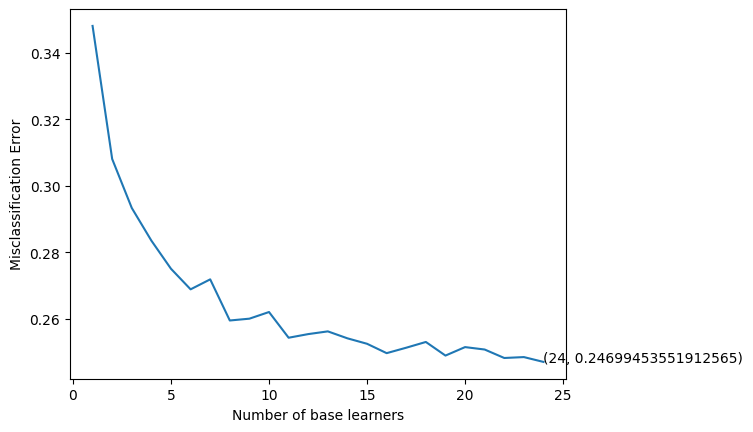

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Train the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                     # Initialize the Random Forest classifier with optimal learners
clf.fit(X_train,y_train)                                               # Fit the classifer on X_train and y_train
clf.score(X_test, y_test)                                               # Find the score on X_train and y_train

0.7685792349726775

In [ ]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)                                   # Complete the code to predict the X_test data using the model built above (forest)

<Axes: >

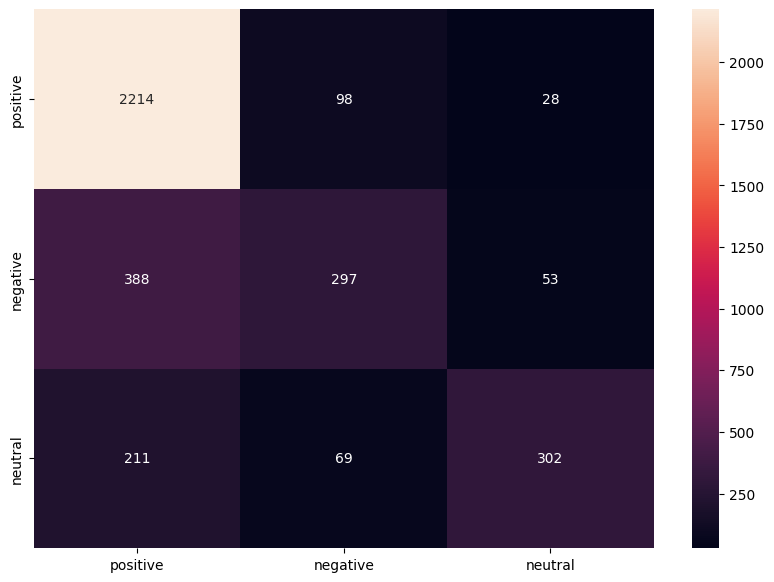

In [ ]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, result)                      # Complete the code to calculate the confusion matrix between test data and restust


df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')                         # Complete the code to plot the heatmap of the confusion matrix

WORDCLOUD OF TOP 20 IMPORTANT FEATURES FROM TF-IDF RANDOM FOREST

In [ ]:
all_features = tfidf_vect.get_feature_names_out()          #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank, not, jetblue, unite, usairways, americanair, southwestair, great, flight, delay, http, cancel, love, awesome, virginamerica, get, hours, hold, call, bag, 
 
 


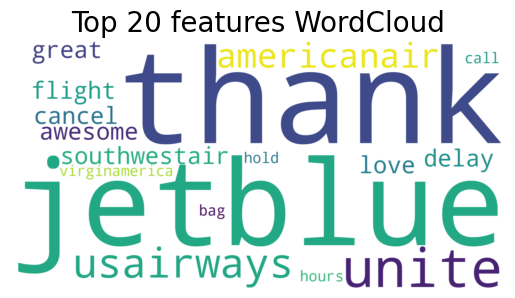

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()